In [1]:
# dependancies
import json
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Arial'

In [2]:
# data paths
SR_readcounts = '../../pipes/SRshotgun_pipeline/b_readMetrics/summary_metrics.json'
LR_readcounts = '../../pipes/LRshotgun_pipeline/b_readMetrics/summary_metrics.json'

In [3]:
# load in read counts from json files
with open(SR_readcounts) as f:
    SR_readcounts_json = json.load(f)

with open(LR_readcounts) as f:
    LR_readcounts_json = json.load(f)

In [4]:
# # inspect data
# print(json.dumps(SR_readcounts_json, indent=4, sort_keys=True))
# print(json.dumps(LR_readcounts_json, indent=4, sort_keys=True))

In [5]:
# # e.g to access data
# print(data['barcode01']['Significant reads (not host or lambda)']) # num bacterial reads
# print(data['barcode01']['Number of reads mapped to chm13 (and depleted)']) # num chm13 reads
# print(data['barcode01']['Number of reads mapped to lambda phage (and depleted)']) # num lambda reads

In [6]:
# load in data
SR_samples = list(SR_readcounts_json.keys())
LR_samples = list(LR_readcounts_json.keys())

SR_reads_df = pd.DataFrame(columns=['Sample', 'Bacterial', 'Human', 'Phage Lambda'])
LR_reads_df = pd.DataFrame(columns=['Sample', 'Bacterial', 'Human', 'Phage Lambda'])

for sample in SR_samples:
    new_row = {
        "Sample": sample,
        "Bacterial": SR_readcounts_json[sample]['Significant reads (not host or lambda)'],
        "Human": SR_readcounts_json[sample]['Number of reads mapped to chm13 (and depleted)'],
        "Phage Lambda": SR_readcounts_json[sample]['Number of reads mapped to lambda phage (and depleted)']
    }
    SR_reads_df = pd.concat([SR_reads_df, pd.DataFrame([new_row])], ignore_index=True)

for sample in LR_samples:
    new_row = {
        "Sample": sample,
        "Bacterial": LR_readcounts_json[sample]['Significant reads (not host or lambda)'],
        "Human": LR_readcounts_json[sample]['Number of reads mapped to chm13 (and depleted)'],
        "Phage Lambda": LR_readcounts_json[sample]['Number of reads mapped to lambda phage (and depleted)']
    }
    LR_reads_df = pd.concat([LR_reads_df, pd.DataFrame([new_row])], ignore_index=True)

In [7]:
SR_reads_df

,Sample,Bacterial,Human,Phage Lambda
0,mockA,56860818,878,0
1,mockB,61758625,831,0
2,mockC,46404967,845,0
3,mockE,62061023,17236967,0
4,mockF,39905959,11320501,118


In [8]:
LR_reads_df

,Sample,Bacterial,Human,Phage Lambda
0,mockA,83472,87,779
1,mockB,62378,136,783
2,mockC,74766,115,586
3,mockD,47794,14401,1955
4,mockE,30691,8770,1122
5,mockF,22125,5875,731


In [9]:
SR_data = SR_reads_df[['Bacterial', 'Human', 'Phage Lambda']].values.astype(np.float64)
LR_data = LR_reads_df[['Bacterial', 'Human', 'Phage Lambda']].values.astype(np.float64)

In [10]:
SRx_labels = SR_reads_df['Sample'].values
SRx_labels

array(['mockA', 'mockB', 'mockC', 'mockE', 'mockF'], dtype=object)

In [16]:
# FIGURE 1 FUNCTION: BACTERIAL v CONTAMINANTS

def figure_1(SR_reads_df, LR_reads_df,  
             background_colour, plot_colour, font_colour, line_colour,
             title, legend_labels, colour_map,
             plot_title1, x_labels1, x_title1, y_title1,
             plot_title2, x_labels2, x_title2, y_title2):
    
    # data
    SR_data = SR_reads_df[legend_labels].values.astype(np.float64)
    LR_data = LR_reads_df[legend_labels].values.astype(np.float64)
    data1 = SR_data / 1e6
    data2 = LR_data / 1e3

    # figure with 2 subplots
    fig, axs = plt.subplots(1, 2, figsize=(8, 5), sharex=False, sharey=False)

    # # SR data
    # Get sample names and data
    x_labels = x_labels1
    x_labs = np.arange(len(x_labels))
    bottom = np.zeros(len(x_labels))
    # Create stacked bars
    for i, category in enumerate(legend_labels):
        axs[0].bar(x_labs, data1[:, i], bottom=bottom, edgecolor=plot_colour, width=0.9, 
                   label=category, color=colour_map[category])
        bottom += data1[:, i].astype(float)
    # Customize x axis
    axs[0].set_xticks(x_labs, x_labels, rotation=0)
    axs[0].set_xlabel(x_title1, color=font_colour)
    axs[0].set_ylabel(y_title1, color=font_colour, fontweight='bold')
    axs[0].set_title(plot_title1, color=font_colour)
    legend0 = axs[0].legend(loc='upper left', fontsize=10)

    # # LR data
    # Get sample names and data
    x_labels = x_labels2
    x_labs = np.arange(len(x_labels))
    bottom = np.zeros(len(x_labels))
    # Create stacked bars
    for i, category in enumerate(legend_labels):
        axs[1].bar(x_labs, data2[:, i], bottom=bottom, edgecolor=plot_colour, width=0.9, 
                   label=category, color=colour_map[category])
        bottom += data2[:, i].astype(float)
    # Customize x axis
    axs[1].set_xticks(x_labs, x_labels, rotation=0)
    axs[1].set_xlabel(x_title2, color=font_colour)
    axs[1].set_ylabel(y_title2, color=font_colour, fontweight='bold')
    axs[1].set_title(plot_title2, color=font_colour)
    legend1 = axs[1].legend(loc='upper right', fontsize=10)

    # # Aesthetics
    # Overall plot
    fig.suptitle(title, fontweight='bold', fontsize=14, color=font_colour)
    plt.tight_layout()
    fig.set_facecolor(background_colour)
    spine_color = line_colour
    spine_linewidth = 1.2
    # plot 0
    axs[0].set_facecolor(plot_colour)
    for spine in axs[0].spines.values():
        spine.set_color(spine_color)
        spine.set_linewidth(spine_linewidth)
    axs[0].tick_params(axis='x', colors=line_colour)
    axs[0].tick_params(axis='y', colors=line_colour)
    axs[0].text(-0.1, 1.05, 'A)', transform=axs[0].transAxes, fontsize=12, fontweight='bold', va='top', color=font_colour)
    
    # plot 1
    axs[1].set_facecolor(plot_colour)
    for spine in axs[1].spines.values():
        spine.set_color(spine_color)
        spine.set_linewidth(spine_linewidth)
    axs[1].tick_params(axis='x', colors=line_colour)
    axs[1].tick_params(axis='y', colors=line_colour)
    # legend colour
    for text in legend0.get_texts():
        text.set_color(font_colour)
    for text in legend1.get_texts():
        text.set_color(font_colour)
    axs[1].text(-0.1, 1.05, 'B)', transform=axs[1].transAxes, fontsize=12, fontweight='bold', va='top', color=font_colour)
    
    # # show plot
    plt.show()

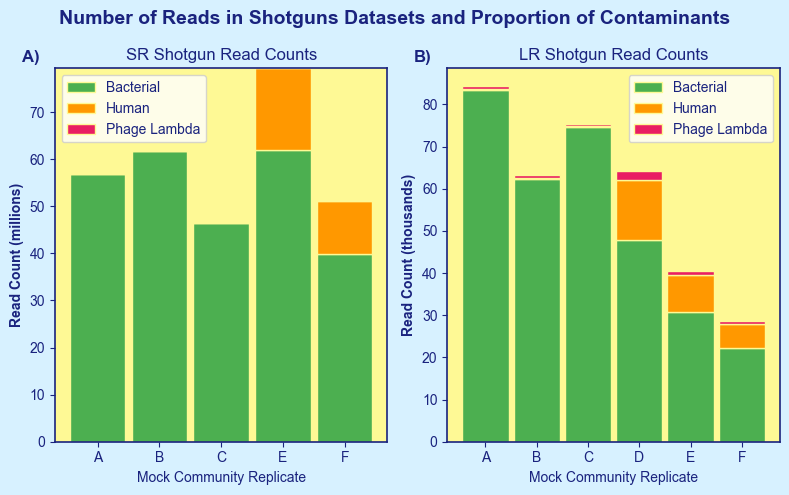

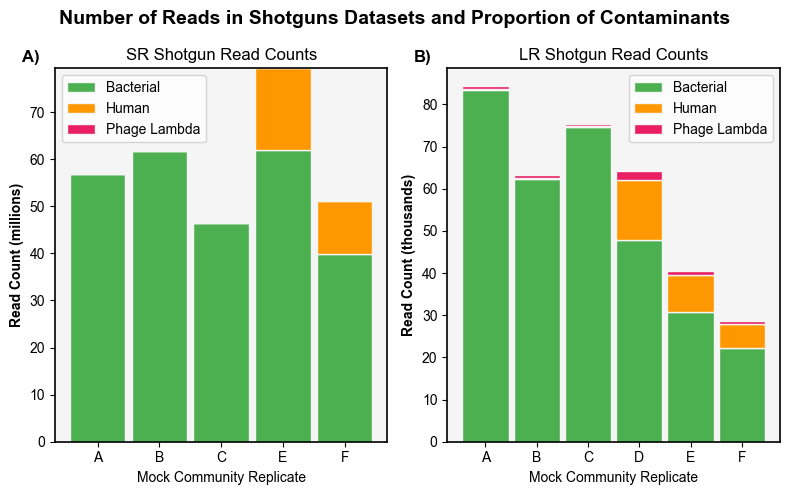

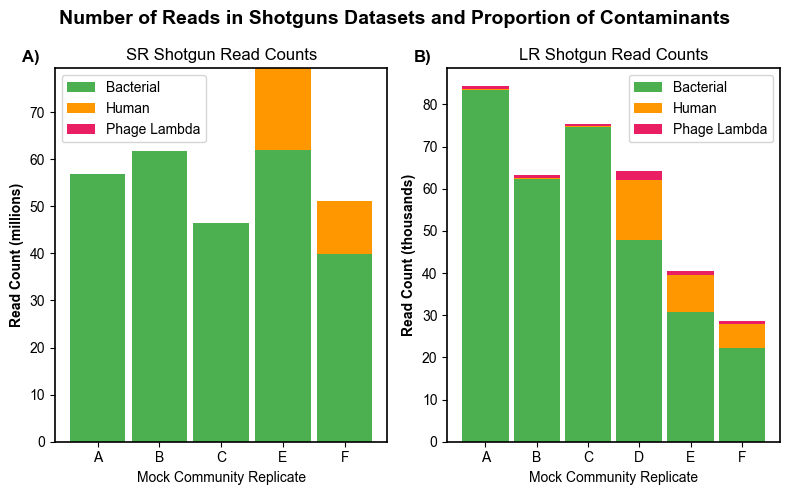

In [17]:
# FIGURE 1 PLOT: BACTERIAL v CONTAMINANTS
title = 'Number of Reads in Shotgun Datasets and Proportion of Contaminants'
legend_labels = ['Bacterial', 'Human', 'Phage Lambda']
colour_map = {"Bacterial": "#4CAF50", "Human": "#FF9800", "Phage Lambda": "#E91E63"}
# plot 1
plot_title1 = 'SR Shotgun Read Counts'
x_labels1 = ['A', 'B', 'C', 'E', 'F']
x_title1 = 'Mock Community Replicate'
y_title1 = 'Read Count (millions)'
# plot 2
plot_title2 = 'LR Shotgun Read Counts'
x_labels2 = ['A', 'B', 'C', 'D', 'E', 'F']
x_title2 = 'Mock Community Replicate'
y_title2 = 'Read Count (thousands)'

# colours 1
background_colour = '#D7F1FF'
plot_colour = '#FEF995'
font_colour = '#1A237E'
line_colour = '#1A237E'

figure_1(SR_reads_df, LR_reads_df, 
         background_colour, plot_colour, font_colour, line_colour,
         title, legend_labels, colour_map,
         plot_title1, x_labels1, x_title1, y_title1,
         plot_title2, x_labels2, x_title2, y_title2)

# plt.savefig('read_counts_bluecolours.png', dpi=300)

# colours 2
background_colour = 'none'
plot_colour = 'whitesmoke'
font_colour = 'black'
line_colour = 'black'

figure_1(SR_reads_df, LR_reads_df, 
         background_colour, plot_colour, font_colour, line_colour,
         title, legend_labels, colour_map,
         plot_title1, x_labels1, x_title1, y_title1,
         plot_title2, x_labels2, x_title2, y_title2)

# plt.savefig('read_counts_greycolours.png', dpi=300)

# colours 3
background_colour = 'none'
plot_colour = 'none'
font_colour = 'black'
line_colour = 'black'

figure_1(SR_reads_df, LR_reads_df, 
         background_colour, plot_colour, font_colour, line_colour,
         title, legend_labels, colour_map,
         plot_title1, x_labels1, x_title1, y_title1,
         plot_title2, x_labels2, x_title2, y_title2)

# plt.savefig('read_counts_transparent.png', dpi=300)

### Read in 16s data, not to plot but to keep csv records

In [ ]:
# data paths
SR16s_readcounts = '../../pipes/SR16s_pipeline/b_readMetrics/summary_metrics.json'
LR16sONT_readcounts = '../../pipes/LR16sONT_pipeline/b_readMetrics/summary_metrics.json'
LR16sKAPA_readcounts = '../../pipes/LR16sKAPA_pipeline/b_readMetrics/summary_metrics.json'

# load in read counts from json files
with open(SR16s_readcounts) as f:
    SR16s_readcounts_json = json.load(f)

with open(LR16sONT_readcounts) as f:
    LR16sONT_readcounts_json = json.load(f)

with open(LR16sKAPA_readcounts) as f:
    LR16sKAPA_readcounts_json = json.load(f)

# load in data
SR16s_samples = list(SR16s_readcounts_json.keys())
LR16sONT_samples = list(LR16sONT_readcounts_json.keys())
LR16sKAPA_samples = list(LR16sKAPA_readcounts_json.keys())

SR16s_reads_df = pd.DataFrame(columns=['Sample', 'Bacterial', 'Human', 'Phage Lambda'])
LR16sONT_reads_df = pd.DataFrame(columns=['Sample', 'Bacterial', 'Human', 'Phage Lambda'])
LR16sKAPA_reads_df = pd.DataFrame(columns=['Sample', 'Bacterial', 'Human', 'Phage Lambda'])

for sample in SR16s_samples:
    new_row = {
        "Sample": sample,
        "Bacterial": SR16s_readcounts_json[sample]['Significant reads (not host or lambda)'],
        "Human": SR16s_readcounts_json[sample]['Number of reads mapped to chm13 (and depleted)'],
        "Phage Lambda": SR16s_readcounts_json[sample]['Number of reads mapped to lambda phage (and depleted)']
    }
    SR16s_reads_df = pd.concat([SR16s_reads_df, pd.DataFrame([new_row])], ignore_index=True)

for sample in LR16sONT_samples:
    new_row = {
        "Sample": sample,
        "Bacterial": LR16sONT_readcounts_json[sample]['Significant reads (not host or lambda)'],
        "Human": LR16sONT_readcounts_json[sample]['Number of reads mapped to chm13 (and depleted)'],
        "Phage Lambda": LR16sONT_readcounts_json[sample]['Number of reads mapped to lambda phage (and depleted)']
    }
    LR16sONT_reads_df = pd.concat([LR16sONT_reads_df, pd.DataFrame([new_row])], ignore_index=True)

for sample in LR16sKAPA_samples:
    new_row = {
        "Sample": sample,
        "Bacterial": LR16sKAPA_readcounts_json[sample]['Significant reads (not host or lambda)'],
        "Human": LR16sKAPA_readcounts_json[sample]['Number of reads mapped to chm13 (and depleted)'],
        "Phage Lambda": LR16sKAPA_readcounts_json[sample]['Number of reads mapped to lambda phage (and depleted)']
    }
    LR16sKAPA_reads_df = pd.concat([LR16sKAPA_reads_df, pd.DataFrame([new_row])], ignore_index=True)


### Save cleaned dataframes

In [ ]:
clean_dfs = SR_reads_df, LR_reads_df, SR16s_reads_df, LR16sONT_reads_df, LR16sKAPA_reads_df

# save clean dfs
for idx, df in enumerate(clean_dfs):
    if idx == 0:
        df.to_csv('clean_data/SRshotgun_contaminants_df.csv', index=False)
    elif idx == 1:
        df.to_csv('clean_data/LRshotgun_contaminants_df.csv', index=False)
    elif idx == 2:
        df.to_csv('clean_data/SR16s_contaminants_df.csv', index=False)
    elif idx == 3:
        df.to_csv('clean_data/LR16sONT_contaminants_df.csv', index=False)
    elif idx == 4:
        df.to_csv('clean_data/LR16sKAPA_contaminants_df.csv', index=False)